## import libraries

In [1470]:
#common imports
import numpy as np
import pandas as pd

#to plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format
from sklearn.svm import SVC

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1471]:
#load dataset
train = pd.read_csv('/Users/user/Downloads/train.csv', parse_dates = ['Datetime'])
test = pd.read_csv('/Users/user/Downloads/test.csv', parse_dates = ['Datetime'])
samplesubmission = pd.read_csv('/Users/user/Downloads/SampleSubmission.csv')

In [1472]:
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,0


In [1473]:
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75000,114.78000,22.20000,56.00000
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03000,52.18000,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35000,346.73000,28.10000,63.00000
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17000,83.85000,21.60000,82.00000
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23000,53.07000,22.70000,80.00000


In [1474]:
samplesubmission.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


In [1475]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


In [1476]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 127361 non-null  object        
 1   Datetime           127361 non-null  datetime64[ns]
 2   Sensor1_PM2.5      127361 non-null  float64       
 3   Sensor2_PM2.5      127361 non-null  float64       
 4   Temperature        39271 non-null   float64       
 5   Relative_Humidity  39271 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.8+ MB


In [1477]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((297177, 7), (127361, 6), (127361, 2))

In [1478]:
train.describe(include = 'all')

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.00000,293563.00000,293628.00000,293628.00000,297177.00000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-10-15 16:00:31,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-21 07:34:57,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.75120,38.18302,23.31655,78.65362,0.37107
std,NaN,NaN,28.52618,28.64776,3.83697,14.77272,0.48309
min,NaN,NaN,-9.45000,-9.70000,16.70000,27.00000,0.00000
25%,NaN,NaN,22.43000,19.52000,20.40000,68.00000,0.00000


<AxesSubplot:>

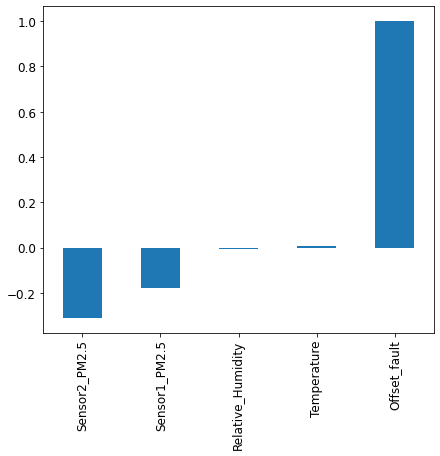

In [1479]:
train.corr()['Offset_fault'].sort_values().plot(kind='bar', figsize=(7, 6))

In [1480]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

<AxesSubplot:xlabel='Offset_fault', ylabel='count'>

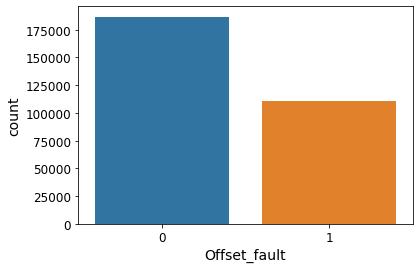

In [1481]:
sns.countplot(train.Offset_fault) 

count                  297177
unique                 293751
top       2021-11-26 17:23:00
freq                        3
first     2021-10-15 16:00:31
last      2022-01-21 07:34:57
Name: Datetime, dtype: object


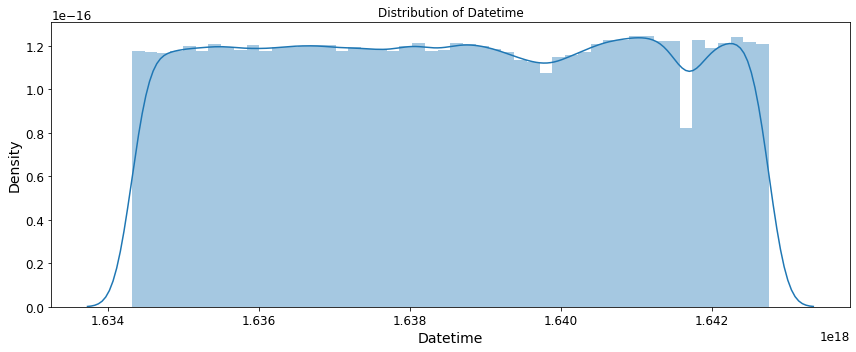

count   293563.00000
mean        40.75120
std         28.52618
min         -9.45000
25%         22.43000
50%         36.47000
75%         49.42000
max        997.96000
Name: Sensor1_PM2.5, dtype: float64


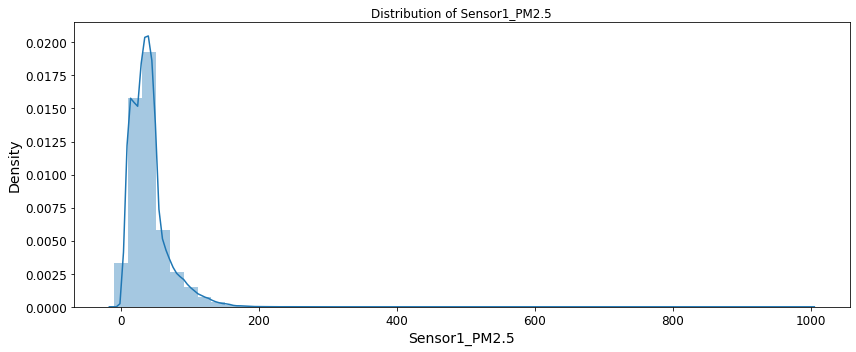

count   293563.00000
mean        38.18302
std         28.64776
min         -9.70000
25%         19.52000
50%         33.72000
75%         47.57000
max        997.26000
Name: Sensor2_PM2.5, dtype: float64


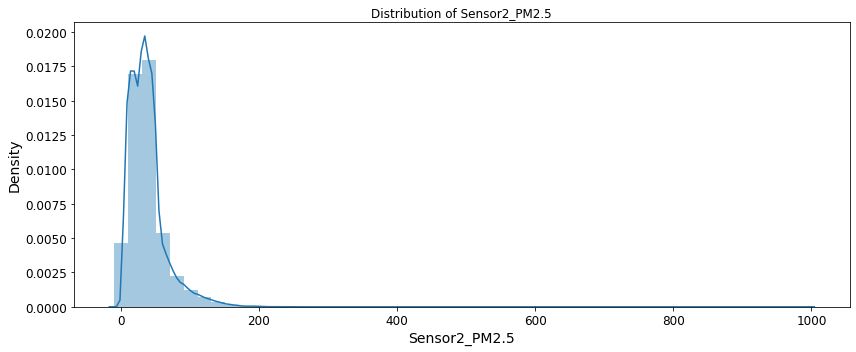

count   293628.00000
mean        23.31655
std          3.83697
min         16.70000
25%         20.40000
50%         21.90000
75%         26.30000
max         34.90000
Name: Temperature, dtype: float64


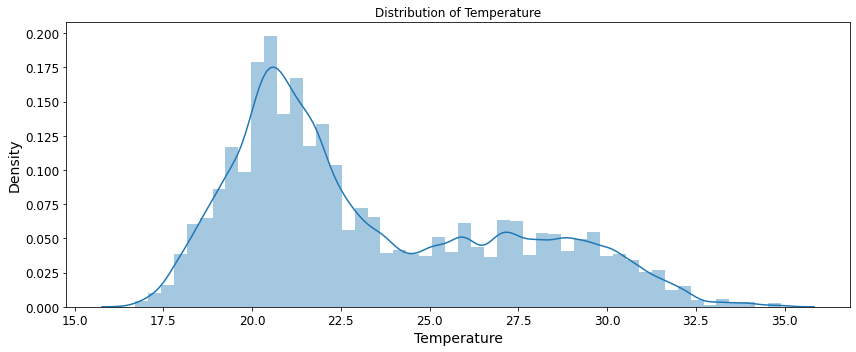

count   293628.00000
mean        78.65362
std         14.77272
min         27.00000
25%         68.00000
50%         84.00000
75%         91.00000
max         99.00000
Name: Relative_Humidity, dtype: float64


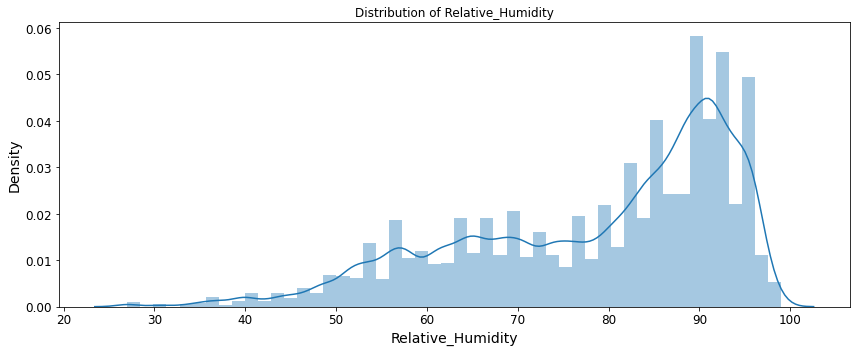

In [1482]:
Offset_fault = train.Offset_fault
numeric_distribution_plot(train.drop('Offset_fault', axis=1))

In [1483]:
Offset_fault.shape

(297177,)

In [1484]:
train = train.drop('Offset_fault', axis=1)
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000


In [1485]:
Offset_fault

0         0
1         0
2         0
3         0
4         0
         ..
297172    0
297173    1
297174    1
297175    0
297176    1
Name: Offset_fault, Length: 297177, dtype: int64

In [1486]:
train.drop(labels='ID', axis=1, inplace=True)

In [1487]:
train.head()

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000
1,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000
2,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000
3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000
4,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000


In [1488]:
# Extract day, month year and hour from the Datetime column
# day
train['Datetime_day'] = train.Datetime.dt.day

# month
train['Datetime_month'] = train.Datetime.dt.month
 
# year
train['Datetime_year'] = train.Datetime.dt.year

# hour
train['Datetime_hour'] = train.Datetime.dt.hour

# Preview engineered date features
train[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,3,11,2021,4
1,2021-11-08 18:43:23,8,11,2021,18
2,2021-11-07 09:50:33,7,11,2021,9
3,2022-01-01 18:55:15,1,1,2022,18
4,2021-11-05 22:23:48,5,11,2021,22


In [1489]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
         # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [1490]:
missing_values_table(train)

Your selected dataframe has 9 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Sensor1_PM2.5,3614,1.20000
Sensor2_PM2.5,3614,1.20000
Temperature,3549,1.20000
Relative_Humidity,3549,1.20000


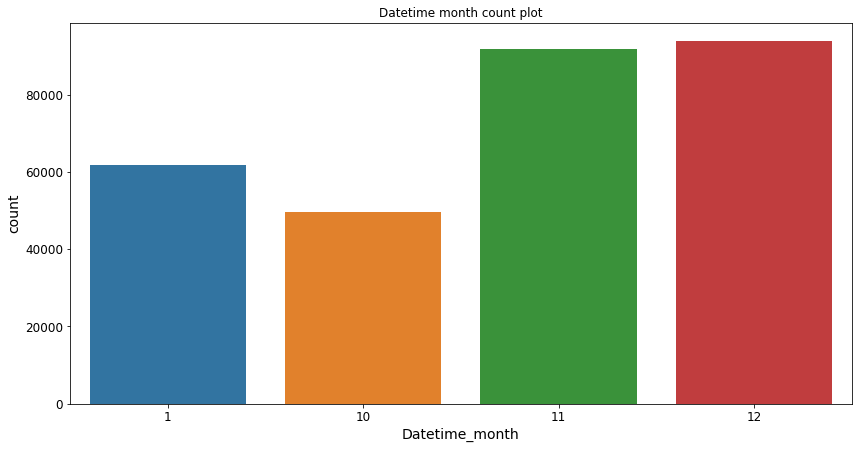

In [1491]:
# Datetime month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Datetime_month', data = train)
plt.title('Datetime month count plot')
plt.show()

In [1492]:
train.Datetime.dt.month.head(30)

0     11
1     11
2     11
3      1
4     11
5      1
6     12
7     11
8     12
9      1
10    12
11     1
12    11
13    11
14     1
15     1
16    11
17     1
18    11
19    11
20    11
21    11
22    12
23    12
24    10
25    11
26    12
27    12
28    12
29    12
Name: Datetime, dtype: int64

In [1493]:
#sns.set(rc={'figure.figsize':(12,6)})
#train["Relative_Humidity"] = pd.to_datetime(train["Relative_Humidity"])
#train["Datetime_month"] = train["Relative_Humidity"].apply(lambda x : x.month)
#key = {1: 'January', 10: 'October', 11: 'November', 12: 'December'  }
#train["Datetime_month"] = train["Datetime_month"].map(key)
#plt.title("Relative humidity across months")
#sns.countplot(train["Datetime_month"])

In [1494]:
mean = train.mean()

In [1495]:
median = train.median()

In [1496]:
train.mode()

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-10-26 02:03:01,37.60000,33.55000,20.30000,91.00000,17.00000,12.00000,2021.00000,4.00000
1,2021-11-05 12:40:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06 18:29:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-08 19:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-13 12:14:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-12-06 02:28:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-12-13 03:17:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-01-07 02:53:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-01-16 19:22:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1497]:
train.fillna(-99999)

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,3,11,2021,4
1,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,8,11,2021,18
2,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,7,11,2021,9
3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,1,1,2022,18
4,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,5,11,2021,22
...,...,...,...,...,...,...,...,...,...
297172,2021-11-19 12:32:00,36.40000,37.77000,28.60000,62.00000,19,11,2021,12
297173,2021-11-22 01:22:54,50.12000,40.63000,21.60000,86.00000,22,11,2021,1
297174,2021-11-05 01:27:31,53.68000,45.23000,20.20000,94.00000,5,11,2021,1
297175,2021-11-23 22:09:30,96.45000,114.67000,20.60000,93.00000,23,11,2021,22


In [1498]:
# Plotting boxplots for each of the numerical columns
#sns.set_style('darkgrid')
#fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
#fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

#for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity']):
 # sns.boxplot(train[name], ax = ax)

In [1499]:
train.head()

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,3,11,2021,4
1,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,8,11,2021,18
2,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,7,11,2021,9
3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,1,1,2022,18
4,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,5,11,2021,22


In [1500]:
# plt.hist(train['Sensor1_PM2.5'])
# plt.title('histogram before removing outlier')
# plt.show()
# train['Sensor1_PM2.5'] = (train['Sensor1_PM2.5']**(1/3))
# plt.hist(train['Sensor1_PM2.5'])
# plt.title('histogram after removing outlier')
# plt.show()


In [1501]:
# plt.hist(train['Sensor2_PM2.5'])
# plt.title('histogram before removing outlier')
# plt.show()
# train['Sensor2_PM2.5'] = (train['Sensor2_PM2.5']**(1/3))
# plt.hist(train['Sensor2_PM2.5'])
# plt.title('histogram after removing outlier')
# plt.show()

In [1502]:
# plt.hist(train['Temperature'])
# plt.title('histogram before removing outlier')
# plt.show()
# train['Temperature'] = (train['Temperature']**(1/3))
# plt.hist(train['Temperature'])
# plt.title('histogram after removing outlier')
# plt.show()  

In [1503]:
# Offset_fault = Offset_fault.value_counts(normalize = True) * 100

<AxesSubplot:xlabel='Offset_fault', ylabel='count'>

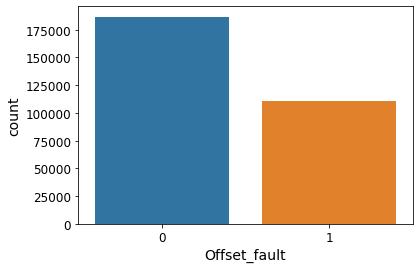

In [1504]:
sns.countplot(Offset_fault)

In [1505]:
train.head()

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,3,11,2021,4
1,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,8,11,2021,18
2,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,7,11,2021,9
3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,1,1,2022,18
4,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,5,11,2021,22


In [1506]:
cols_to_remove = ['Datetime_year', 'Datetime_day']
train = train.drop(columns=cols_to_remove, axis=1)

In [1507]:
train.head()

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_month,Datetime_hour
0,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,11,4
1,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,11,18
2,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,11,9
3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,1,18
4,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,11,22


In [1508]:
train['Datetime_month'].head(20)

0     11
1     11
2     11
3      1
4     11
5      1
6     12
7     11
8     12
9      1
10    12
11     1
12    11
13    11
14     1
15     1
16    11
17     1
18    11
19    11
Name: Datetime_month, dtype: int64

In [1509]:
#test['Datetime_day'] = test.Datetime.dt.day
test['Datetime_month'] = test.Datetime.dt.month
#test['Datetime_year'] = test.Datetime.dt.year
test['Datetime_hour'] = test.Datetime.dt.hour
test=test.fillna(-99999)

In [1510]:
test = test.drop('ID', axis=1)

In [1511]:
test.shape, train.shape

((127361, 7), (297177, 7))

In [1512]:
train.head()

,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_month,Datetime_hour
0,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,11,4
1,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,11,18
2,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,11,9
3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,1,18
4,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,11,22


In [1513]:
Offset_fault.shape

(297177,)

In [1514]:
train.shape, test.shape

((297177, 7), (127361, 7))

In [1515]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [1516]:
from sklearn.model_selection import train_test_split
#from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [1517]:
train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',\
               'Datetime_month', 'Datetime_hour']

X = train[train_feats].fillna(-99999)
y = Offset_fault

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,  random_state=42)

#import imblearn
from imblearn.over_sampling import SMOTE
#counter = Counter(y_train)
#print('before', counter)
#smt = SMOTE()
#X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
#counter = Counter(y_train_sm)
#print('before', counter)

ros = RandomOverSampler(random_state=0, sampling_strategy=1)
X_train_sm, y_train_sm = ros.fit_resample(X_train, y_train)


# Instantiating the model
# clf = CatBoostClassifier()
# model = CatBoostClassifier(n_estimator=4000,
#                            objective='CrossEntropy',
#                            random_seed='seed',
#                            early_stopping_round=200,
#                            use_best_model=True,
#                            eval_metric='accuracy',
#                           learning_rate=0.01)

model=CatBoostClassifier(iterations=100,
                          learning_rate=1,
                          depth=16,)
model.fit(X_train_sm, y_train_sm)

# Making predictions
y_pred = model.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

0:	learn: 0.4277264	total: 744ms	remaining: 1m 13s
1:	learn: 0.3388116	total: 1.52s	remaining: 1m 14s
2:	learn: 0.2804827	total: 2.19s	remaining: 1m 10s
3:	learn: 0.2474793	total: 2.97s	remaining: 1m 11s
4:	learn: 0.2300765	total: 3.62s	remaining: 1m 8s
5:	learn: 0.2141164	total: 4.21s	remaining: 1m 5s
6:	learn: 0.1996925	total: 4.79s	remaining: 1m 3s
7:	learn: 0.1906759	total: 5.36s	remaining: 1m 1s
8:	learn: 0.1829534	total: 5.94s	remaining: 1m
9:	learn: 0.1789729	total: 6.53s	remaining: 58.8s
10:	learn: 0.1721318	total: 7.1s	remaining: 57.4s
11:	learn: 0.1663893	total: 7.67s	remaining: 56.2s
12:	learn: 0.1610983	total: 8.24s	remaining: 55.1s
13:	learn: 0.1581012	total: 8.82s	remaining: 54.2s
14:	learn: 0.1538209	total: 9.41s	remaining: 53.3s
15:	learn: 0.1483334	total: 10s	remaining: 52.5s
16:	learn: 0.1459662	total: 10.6s	remaining: 51.9s
17:	learn: 0.1439544	total: 11.3s	remaining: 51.3s
18:	learn: 0.1397205	total: 11.9s	remaining: 50.7s
19:	learn: 0.1375944	total: 12.5s	remaining

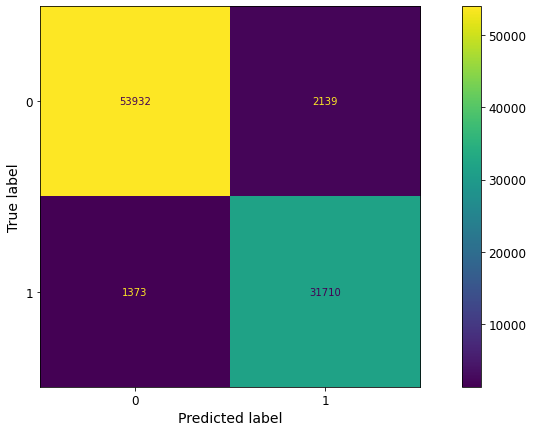

In [1522]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

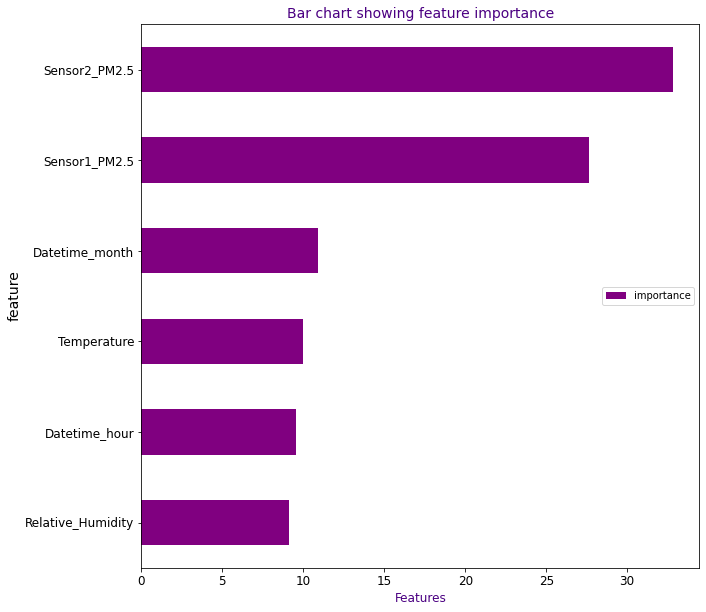

In [1523]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

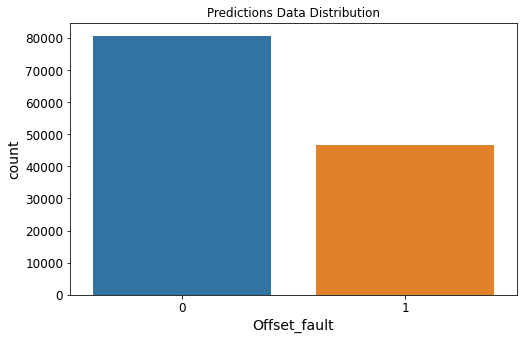

In [1524]:
# Make prediction on the test set
test_df = test[train_feats]
predictions = model.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [1525]:
# Create file
sub_file.to_csv('Baseline_22.csv', index = False)